In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy import stats
%matplotlib inline

# Introduction
This model was developed as part of the NASA Big Idea Challenge 2018 by Will Evonosky to quantify how often our proposed mars solar array would need to mitigate dust. This model applies to any surface on Mars which is subject to dust accumulation and has the ability to remove dust. The model takes as inputs the percent obscuration rate and maximum acceptable obscuration percentage and outputs an estimate of the amount of mitigations required in an Earth year. Details and theory are discussed below.

## Inputs
The two variables below a_rate and a_limit are the percent obscuration rate and maximum tolerable obcuration percentage. The default rate set below was derrived from the pathfinder mission's solar array performance over time. The maximum tolerable percent obscuration is a mission dependent variable that depends on, in the case of a solar array, the minimum tolerable power output of the array. It is acceptable to assume a one to one percent loss in power for each percent of obscuration, but more detailed analyses are encouraged. The last variable defines how long to run each simulation in one day increments.

In [6]:
a_rate = .29 #percent/day
a_limit = 5 #percent
days = np.arange(0, 365, 1)

## The Model
This is a very simple model and has lots of room for growth. Step by step the model does the following:
* The number of years to run is assigned to the years variable
* Each years starting obscuration percentage is set to zero (ca variable)
* The current ca value is added to the array list
* A check is made to see if ca is less than a_limit
    * ca < a_limit : a randomly sampled value from a chi-square distrbution with mean (a_rate) is added to ca
    * ca > a_limit: ca is reset by sampling a normal distribution whose mean is zero and standard deviation small
* Once the year is complete, that years data is added to the total list

A chi-square dstrbution with a small mean has most of its probability mass clustered toward lower values and is why we sample such a distrbution. We can assume that most non-mean daily obscuration rates will be lower than the mean rather than higher so we want to sample those more often. We allow for larger rates, but wan't them to be less frequent. 

Next, the ca variable is not reset to zero after a_limit is reached since realistic dust mitigation strategies do not remove 100% of the dust. Therefore we sample a normal distrbution to set the base obscuation rate for the next build up cycle.


In [14]:
total = []
years = 100
for i in range(years):
    array = []
    ca = 0
    for i in days:
        array.append(ca)
        if ca < a_limit:
            ca += np.random.chisquare(df = a_rate)
        else:
            ca = np.abs(np.random.normal(0, .5, 1)[0])
    total.append(array)

## Model Results
Below is a plot of 100 years of the simulation. The x-axis is the number of days in an Earth year (or the amount of time set to the days variable) and the y -axis is each days obscuration percentage. We can see that 'most' mitigations occur when the obscuration percentage reaches just above 5%, but that larger percentages exist of 13-14%. This occurs at times when the obscuration percentage is close to the limit and then the next day sampled has a higher than average deposition rate. We used this feature to explain frequent (but non-physical and thus 'worst-case') dust storms. An easy improvement to this model would be to limit how quickly one data point can vary from another. In other words, eliminate scenarios where one day is very quiet, the next there is a huge and short dust storm, and the next day quiet again.

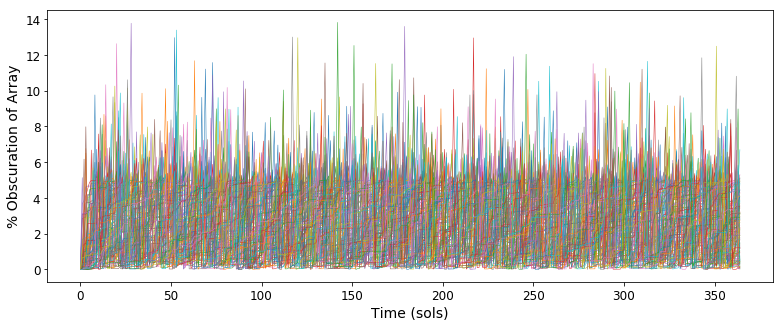

In [8]:
fig = plt.figure(figsize=(13,5))
ax1 = plt.subplot(1,1,1)

for i in total:
    ax1.plot(days, i, linewidth = .5)
ax1.set_ylabel('% Obscuration of Array', size = 14)
ax1.set_xlabel('Time (Days)', size = 14)
ax1.tick_params("both", labelsize = 12)
#plt.savefig("100years.jpg", dpi=500)

## Total Mitigations Per year
In this bit of code, we estimate the total amount of times the system had to mitigate dust per year by counting the 'peaks' in each year. We do this so that we can quantify the lowest, average, and highest mitigations in a year and thus quanitfy the operation time of mechanical and electrical components.

In [9]:
total = np.asarray(total)
totpeaks = []
for i in total:
    totpeaks.append(np.shape(argrelextrema(i, np.greater))[1])

Below is a box plot of the mitigation amounts for 100 years calculated in the previous step. The red line is the median amount of mitigations in the 100 year sample.

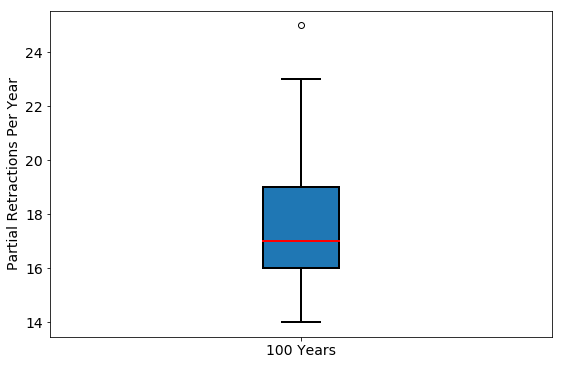

In [10]:
fig = plt.figure(figsize = (9,6))
ax = plt.subplot(1,1,1)
bp = ax.boxplot(totpeaks, patch_artist = True)
for box in bp['boxes']:
    box.set(linewidth = 2)
for whisker in bp['whiskers']:
    whisker.set(linewidth = 2)
for cap in bp['caps']:
    cap.set(linewidth = 2)
for median in bp['medians']:
    median.set(color = 'red', linewidth = 2)
ax.set_xticklabels(["100 Years"])
ax.tick_params("both", labelsize = 14)
ax.set_ylabel("Partial Retractions Per Year", size = 14)
#plt.savefig("BoxMitigations.jpg", dpi=500)

In [11]:
print ('The mean mitigations is ' + str(np.mean(totpeaks)))

The mean mitigations is 17.4


## Low, Average, and High Mitigations
In this step, we are simply extracting what the lowest, average, and highest number of mitigations were in the 100 year sample and extracting example years for each. Lastly, we plot the results below which is the same as the 100 years plot but showing only an example year sampled from the 100 years simulation of the lowest (top), average (middle), and highest (bottom) years. If we wanted to quantify how often we will need to mitigate dust, we simply divide 365 days by the average mitigations. This is useful in quantifying component use over the course of mission years as well as begin to estimate wear and tear. 

In [12]:
totpeaks = np.asarray(totpeaks)
low = total[np.where(totpeaks == min(totpeaks))[0]]
avg = total[np.where(totpeaks == int(np.mean(totpeaks)))[0]]
high = total[np.where(totpeaks == max(totpeaks))[0]]

lv = totpeaks[np.where(totpeaks == min(totpeaks))[0]]
av = totpeaks[np.where(totpeaks == int(np.mean(totpeaks)))[0]]
hv = totpeaks[np.where(totpeaks == max(totpeaks))[0]]

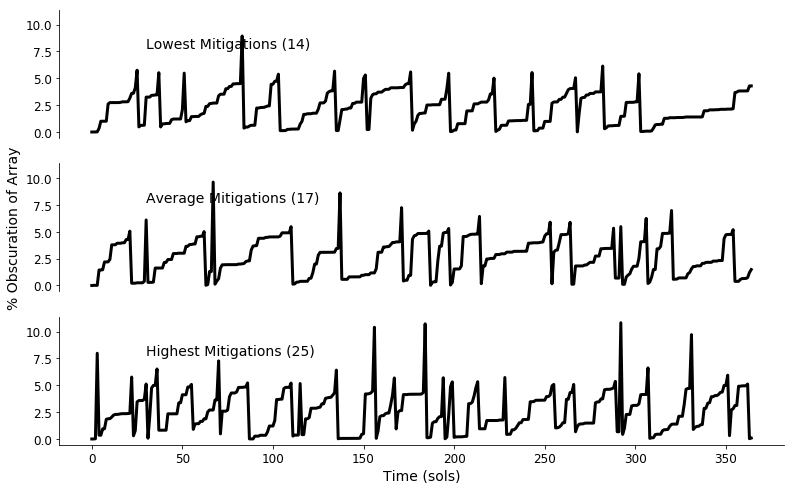

In [13]:
fig = plt.figure(figsize=(13,8))

ax1 = plt.subplot(3,1,1)
ax1.plot(days, low[0], c = 'black', linewidth = 3)
#ax1.set_ylabel('Low', size = 14)
ax1.tick_params("y", labelsize = 12)
ax1.tick_params("x", bottom = "off", labelbottom = "off")
ax1.spines['top'].set_color('None')                                                                     
ax1.spines['right'].set_color('None')
ax1.spines['bottom'].set_color('None')
ax1.text(30, 7.8, "Lowest Mitigations ("+ str(lv[0]) +")", size = 14)

ax2 = plt.subplot(3,1,2, sharey = ax1)
ax2.plot(days, avg[0], c = 'black', linewidth = 3)
ax2.set_ylabel('% Obscuration of Array', size = 14)
ax2.tick_params("y", labelsize = 12)
ax2.tick_params("x", bottom = "off", labelbottom = "off")
ax2.spines['top'].set_color('None')                                                                     
ax2.spines['right'].set_color('None')
ax2.spines['bottom'].set_color('None')
ax2.text(30, 7.8, "Average Mitigations ("+ str(av[0]) +")", size = 14)

ax3 = plt.subplot(3,1,3, sharey = ax1)
ax3.plot(days, high[0], c = 'black', linewidth = 3)
#ax3.set_ylabel('High', size = 14)
ax3.set_xlabel('Time (days)', size = 14)
ax3.tick_params("both", labelsize = 12)
ax3.spines['top'].set_color('None')                                                                     
ax3.spines['right'].set_color('None')
ax3.text(30, 7.8, "Highest Mitigations ("+ str(hv[0]) +")", size = 14)
plt.savefig("lowavghigh.jpg", dpi=500)